In [1]:

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#sys.path.append('../src')
#from ocr.helpers import implt, resize, ratio

%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 9.0)



In [2]:
IMG = "ph"    # Image name/number

# Loading images and ploting it (converting to RGB from BGR)
image = cv2.cvtColor(cv2.imread("../data/pages/%s.jpg" % IMG), cv2.COLOR_BGR2RGB)
implt(image)



error: OpenCV(3.4.4) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


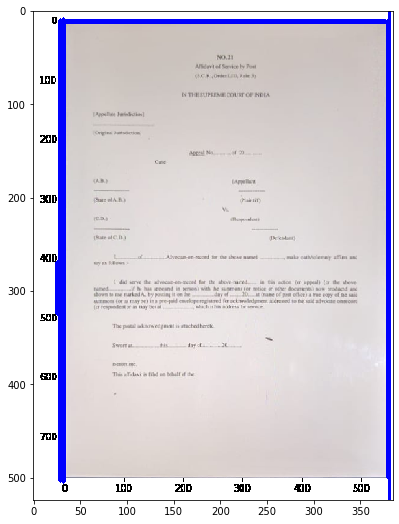

In [16]:
# Python program to illustrate HoughLine 
# method for line detection 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Reading the required image in 
# which operations are to be done. 
# Make sure that the image is in the same 
# directory in which this python program is 
img = cv2.imread('index.png') 

# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

# Apply edge detection method on the image 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 

# This returns an array of r and theta values 
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 


# The below for loop runs till r and theta values 
# are in the range of the 2d array 
for r,theta in lines[0]: 
	
	# Stores the value of cos(theta) in a 
	a = np.cos(theta) 

	# Stores the value of sin(theta) in b 
	b = np.sin(theta) 
	
	# x0 stores the value rcos(theta) 
	x0 = a*r 
	
	# y0 stores the value rsin(theta) 
	y0 = b*r 
	
	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
	x1 = int(x0 + 1000*(-b)) 
	
	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
	y1 = int(y0 + 1000*(a)) 

	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
	x2 = int(x0 - 1000*(-b)) 
	
	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
	y2 = int(y0 - 1000*(a)) 
	
	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
	# (0,0,255) denotes the colour of the line to be 
	#drawn. In this case, it is red. 
	cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 
	
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img) 
plt.imshow(img)

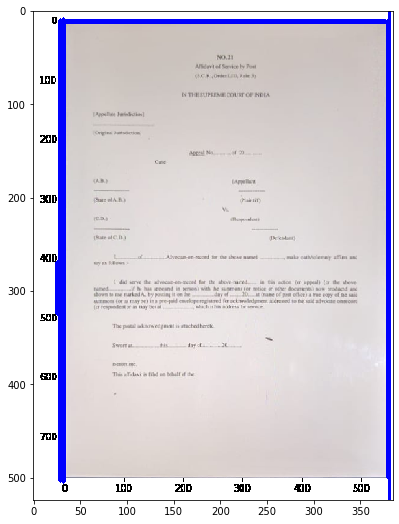

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('index.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 7)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
plt.imshow(img)

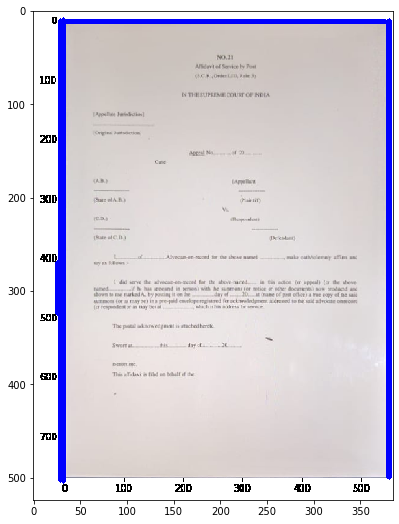

In [18]:
import math
img = cv2.imread("index.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, 1, math.pi/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (0,0,255), 3)
cv2.imwrite("index.png", img)
plt.imshow(img)

6
[[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]]


0

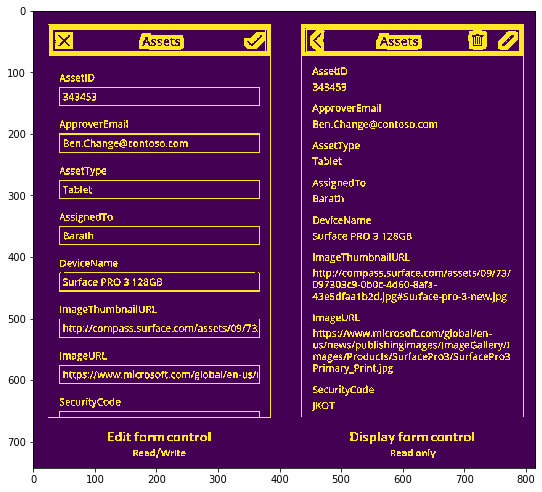

In [29]:
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
import numpy as np
import sys
import cv2 as cv

def image(argv):
    # [load_image]
    # Check number of arguments
    print(len(argv))
    if len(argv) < 1:
        print ('Not enough parameters')
        print ('Usage:\nmorph_lines_detection.py < path_to_image >')
        return -1
    # Load the image
    src = cv.imread(argv, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1
    # Show source image
    plt.imshow(src)
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    plt.imshow(gray)
    print(gray)
    # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv.bitwise_not(gray)
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
    show_wait_destroy("binary", bw)
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv.erode(horizontal, horizontalStructure)
    horizontal = cv.dilate(horizontal, horizontalStructure)
   # plt.imshow(horizontal)
    # Show extracted horizontal lines
   # show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    #show_wait_destroy("vertical", vertical)
    # [vert]
    # [smooth]
    # Inverse vertical image
    vertical = cv.bitwise_not(vertical)
    #show_wait_destroy("vertical_bit", vertical)
    '''
    Extract edges and smooth image according to the logic
    1. extract edges
    2. dilate(edges)
    3. src.copyTo(smooth)
    4. blur smooth img
    5. smooth.copyTo(src, edges)
    '''
    # Step 1
    edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    #show_wait_destroy("edges", edges)
    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv.dilate(edges, kernel)
    #show_wait_destroy("dilate", edges)
    # Step 3
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv.blur(smooth, (2, 2))
    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    # Show final result
    #show_wait_destroy("smooth - final", vertical)
    # [smooth]
    return 0
image("i1.png")

In [5]:
# [load_image]
argv="index.png"
    # Check number of arguments
print(len(argv))
if len(argv) < 1:
    print ('Not enough parameters')
    print ('Usage:\nmorph_lines_detection.py < path_to_image >')
    
 # Load the image
src = cv.imread(argv, cv.IMREAD_COLOR)
 # Check if image is loaded fine
if src is None:
    print ('Error opening image: ' + argv[0])
# Show source image
plt.imshow(src)
 # [load_image]
    # [gray]
    # Transform source image to gray if it is not already    
 

9


NameError: name 'cv' is not defined

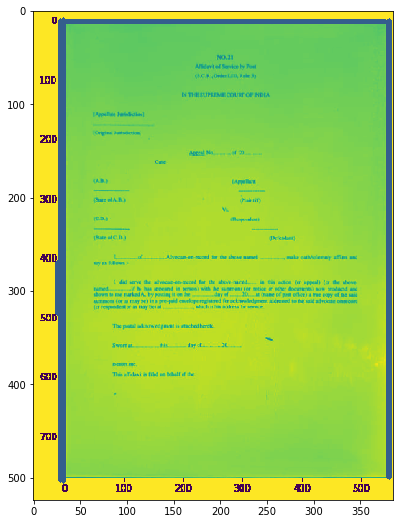

In [193]:

if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
else:
    gray = src
    # Show gray image
plt.imshow(gray)
   

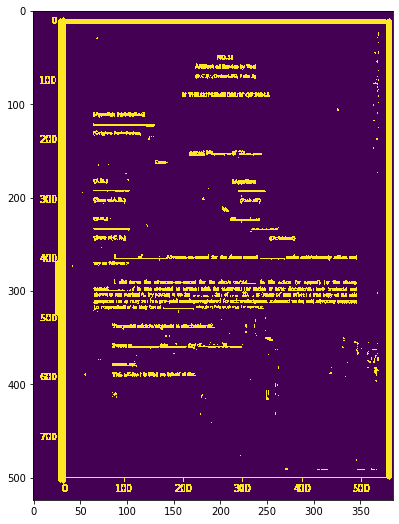

In [194]:
 # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
plt.imshow(bw)
    

In [3]:
ret, thresh = cv2.threshold(bw, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
print('Number of lines:', len(contours))
img = cv2.drawContours(bw, contours, -1, (0,255,0), 3)
plt.imshow(img)

NameError: name 'bw' is not defined

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


True

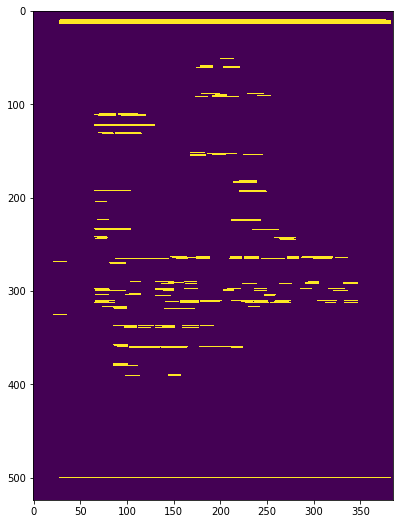

In [196]:
# [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)

#plt.imshow(horizontal)

vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)

plt.imshow(horizontal)

horizontal = cv.dilate(horizontal, horizontalStructure)
print(horizontal)
plt.imshow(horizontal)
cv2.imwrite('horizontal.jpg',horizontal)

In [2]:
import cv2
import numpy as np

img = cv2.imread('horizontal.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    print(x1,x2,y1,y2)
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
plt.imshow(img)

TypeError: 'NoneType' object is not subscriptable

In [3]:
import cv2
import numpy as np
from functools import reduce

def Average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst) 

img = cv2.imread('horizontal.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 1
maxLineGap = 0
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

print(len(lines))
x1list=[]
x2list=[]
diff=[]
for i in range(0,len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        x1list.append(x1)
        x2list.append(x2)
        diff.append(x2-x1)
plt.imshow(img)
avg=Average(diff)
print(avg)
print(diff)
countdiff=[]
diffindiff=[]
for x in diff:
    countdiff.append(diff.count(x))
    
for x in range(len(diff)-1):
    diffindiff.append(abs(diff[x+1]-diff[x]))

diffindiff.sort()
    
print(diffindiff)
cv2.imwrite('houghlines5.jpg',img)
count=0
for x in countdiff:
    if x>2:
        count=count+1
if count>0:
    print("Above image is of a form")
elif min(diffindiff)<10:
    print("Above image is of a form")
else:
    print("Not a form")

TypeError: object of type 'NoneType' has no len()

In [199]:
from skimage import measure
labels = measure.label(horizontal)
print(labels)
print(len(labels[0]))
print(labels.max())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
385
87


In [200]:
!pip install scikit-image

[array([[[  0,   0]],

       [[  0, 523]],

       [[384, 523]],

       [[384,   0]]], dtype=int32)]
Number of lines: 1


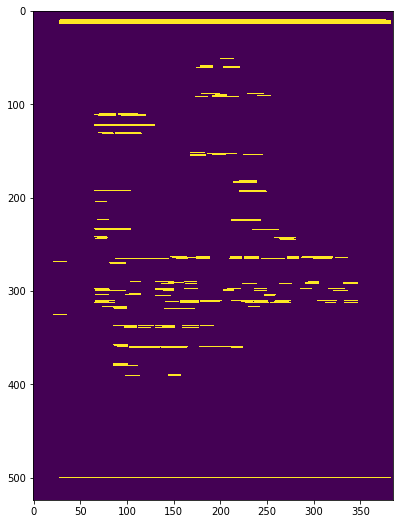

In [201]:
ret, thresh = cv2.threshold(horizontal, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
print('Number of lines:', len(contours))
plt.imshow(horizontal)

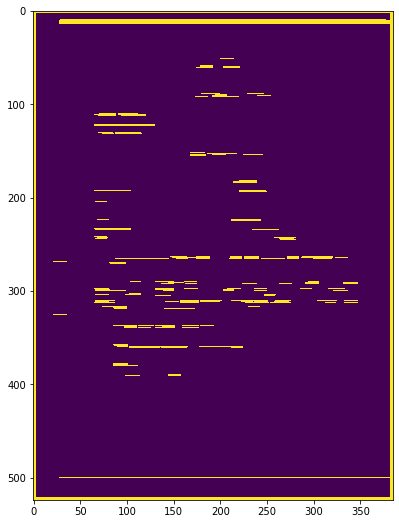

In [202]:
im = cv2.drawContours(horizontal, contours, -1, (255,255,255), 3)
plt.imshow(im)

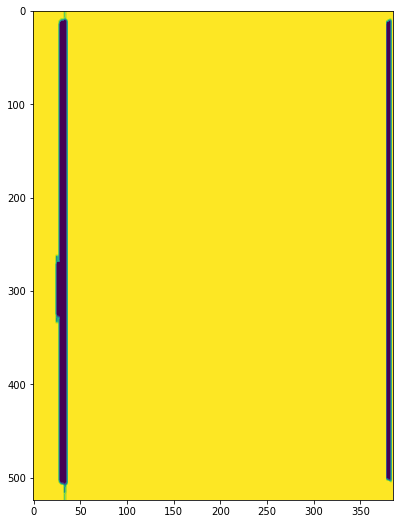

In [218]:
# Show extracted horizontal lines
   # show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    #show_wait_destroy("vertical", vertical)
    # [vert]
    # [smooth]
    # Inverse vertical image
vertical = cv.bitwise_not(vertical)
    #show_wait_destroy("vertical_bit", vertical)

    
    # Step 1
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    #show_wait_destroy("edges", edges)
    # Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
    #show_wait_destroy("dilate", edges)
    # Step 3
smooth = np.copy(vertical)
    # Step 4
smooth = cv.blur(smooth, (2, 2))
    # Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
    # Show final result
plt.imshow(vertical)
    # [smooth]
